<a href="https://colab.research.google.com/github/sgu20191619/DACON/blob/main/LGAImers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [256]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [257]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
import sklearn
sklearn.__version__

'1.0.2'

In [259]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [260]:
train_df = pd.read_csv("/content/drive/MyDrive/LGAimers/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/LGAimers/test.csv")

In [261]:
train_df = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])
test_df = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

from sklearn.preprocessing import LabelEncoder

qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_df[i])
    train_df[i] = le.transform(train_df[i])
    
    for label in np.unique(test_df[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_df[i] = le.transform(test_df[i]) 
print('Done.')

Done.


In [262]:
def print_statistics(df, col):

  max = df[col].max()
  min = df[col].min()
  mean = df[col].mean()
  median = df[col].median()

  print(f'{col}의 최대값 : {max}')
  print(f'{col}의 최소값 : {min}')
  print(f'{col}의 평균값 : {mean}')
  print(f'{col}의 중앙값 : {median}')

In [263]:
def value_hist(df, col, target='Y_Quality'):

  for value in df[col].unique():

    cond = (df[col]==value)
    cond_df = df.loc[cond]

    print(f'{value} 데이터 갯수 : {cond_df.shape[0]}')
    print_statistics(cond_df, target)

    fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

    sns.histplot(data=cond_df, x='Y_Quality', ax=ax[0])
    ax[0].set_title(f'{col} {value}')
    ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)

    sns.boxplot(data=cond_df, x='Y_Quality', ax=ax[1])
    ax[1].set_title(f'{col} {value} Box Plot')
    
    plt.show()

In [264]:
def value_hist2(df, col, target='Y_Class'):

  for value in df[col].unique():

    cond = (df[col]==value)
    cond_df = df.loc[cond]

    print(f'{value} 데이터 갯수 : {cond_df.shape[0]}')
    print_statistics(cond_df, target)

    fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

    sns.histplot(data=cond_df, x='Y_Class', ax=ax[0])
    ax[0].set_title(f'{col} {value}')
    ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)

    sns.boxplot(data=cond_df, x='Y_Class', ax=ax[1])
    ax[1].set_title(f'{col} {value} Box Plot')
    
    plt.show()

1 데이터 갯수 : 407
Y_Quality의 최대값 : 0.534842857
Y_Quality의 최소값 : 0.525085714
Y_Quality의 평균값 : 0.5302534412850123
Y_Quality의 중앙값 : 0.530307937


<ipython-input-263-2faa018d6214>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


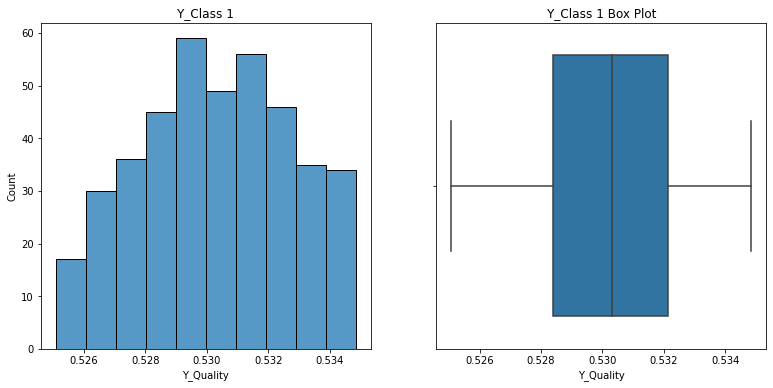

2 데이터 갯수 : 103
Y_Quality의 최대값 : 0.57884127
Y_Quality의 최소값 : 0.534950794
Y_Quality의 평균값 : 0.5420308521844659
Y_Quality의 중앙값 : 0.538507937


<ipython-input-263-2faa018d6214>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


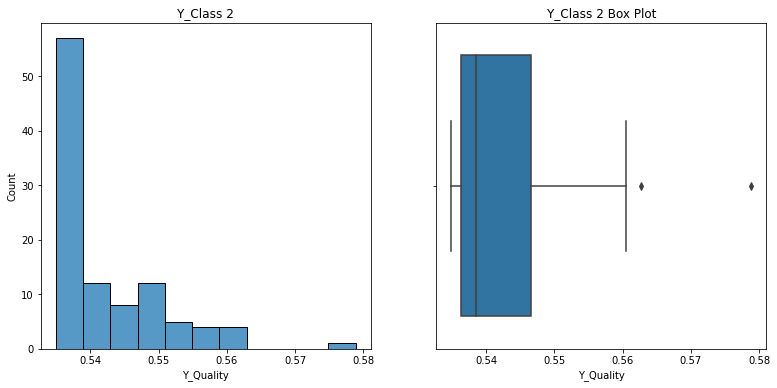

0 데이터 갯수 : 88
Y_Quality의 최대값 : 0.525066667
Y_Quality의 최소값 : 0.500855556
Y_Quality의 평균값 : 0.5208367966249999
Y_Quality의 중앙값 : 0.5220539685000001


<ipython-input-263-2faa018d6214>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


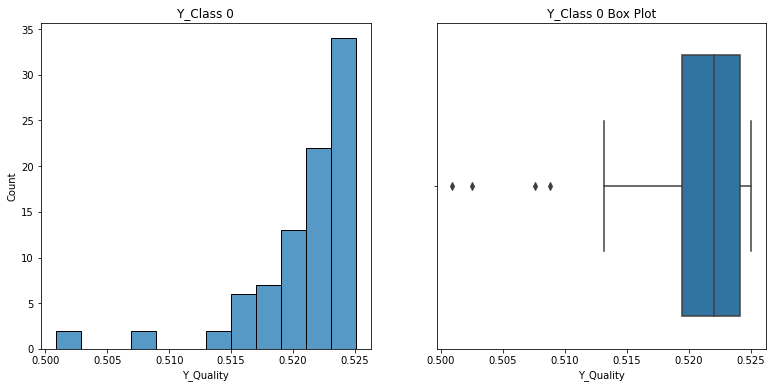

In [265]:
value_hist(train_df,"Y_Class")

0 데이터 갯수 : 249
Y_Class의 최대값 : 2
Y_Class의 최소값 : 0
Y_Class의 평균값 : 1.0441767068273093
Y_Class의 중앙값 : 1.0


<ipython-input-264-3ac6e3c47aca>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


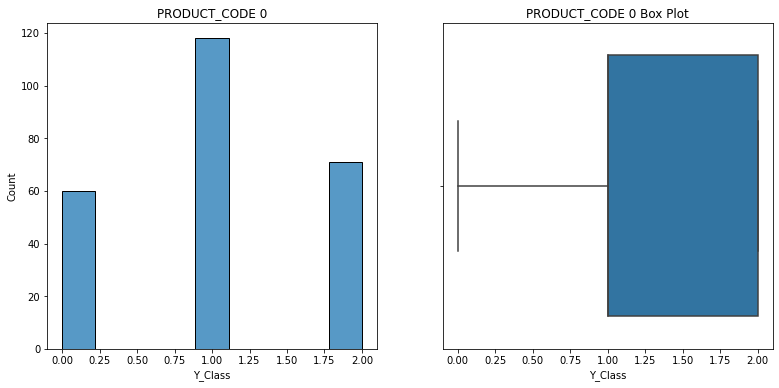

2 데이터 갯수 : 343
Y_Class의 최대값 : 2
Y_Class의 최소값 : 0
Y_Class의 평균값 : 1.0058309037900874
Y_Class의 중앙값 : 1.0


<ipython-input-264-3ac6e3c47aca>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


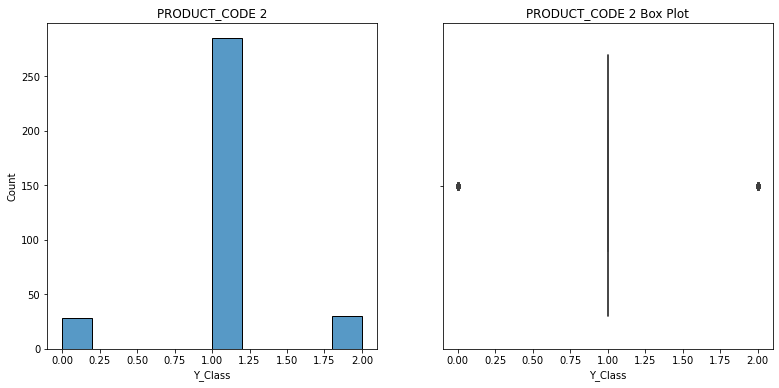

1 데이터 갯수 : 6
Y_Class의 최대값 : 2
Y_Class의 최소값 : 1
Y_Class의 평균값 : 1.3333333333333333
Y_Class의 중앙값 : 1.0


<ipython-input-264-3ac6e3c47aca>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


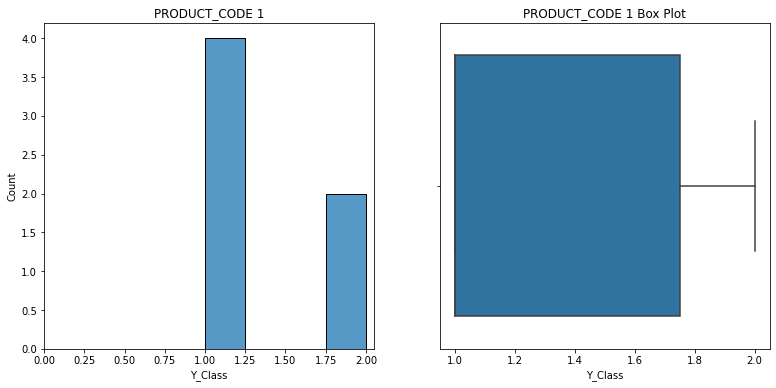

In [266]:
value_hist2(train_df,"PRODUCT_CODE")

2 데이터 갯수 : 78
Y_Class의 최대값 : 2
Y_Class의 최소값 : 0
Y_Class의 평균값 : 0.7564102564102564
Y_Class의 중앙값 : 1.0


<ipython-input-264-3ac6e3c47aca>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


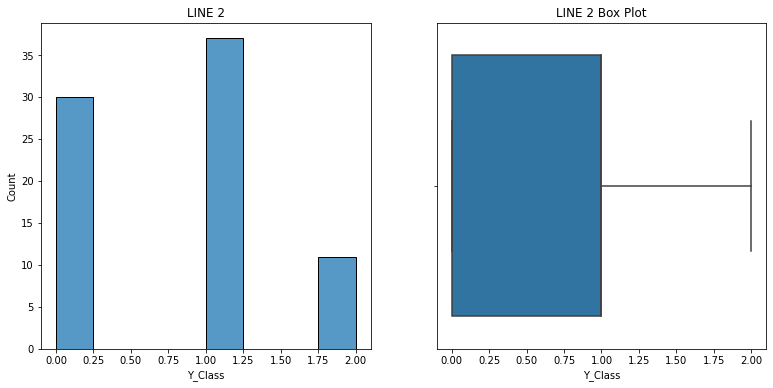

3 데이터 갯수 : 42
Y_Class의 최대값 : 2
Y_Class의 최소값 : 0
Y_Class의 평균값 : 1.2619047619047619
Y_Class의 중앙값 : 2.0


<ipython-input-264-3ac6e3c47aca>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


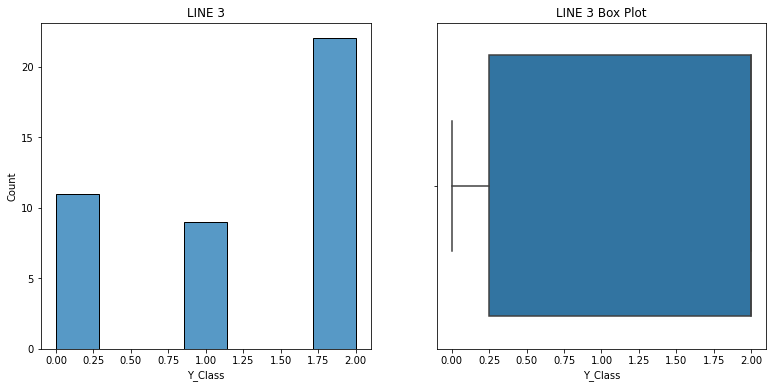

4 데이터 갯수 : 175
Y_Class의 최대값 : 2
Y_Class의 최소값 : 0
Y_Class의 평균값 : 0.9828571428571429
Y_Class의 중앙값 : 1.0


<ipython-input-264-3ac6e3c47aca>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


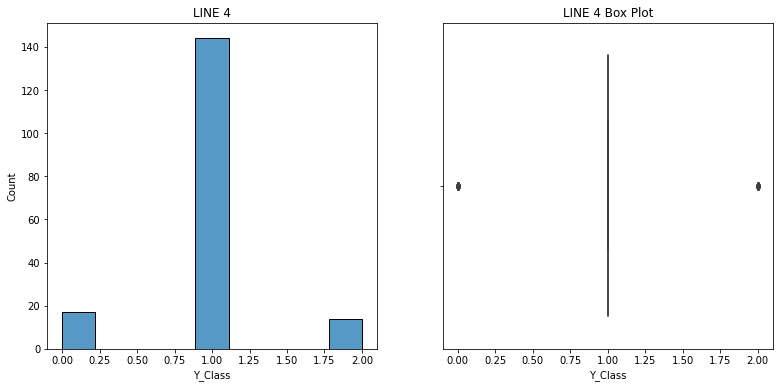

5 데이터 갯수 : 174
Y_Class의 최대값 : 2
Y_Class의 최소값 : 0
Y_Class의 평균값 : 1.0402298850574712
Y_Class의 중앙값 : 1.0


<ipython-input-264-3ac6e3c47aca>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


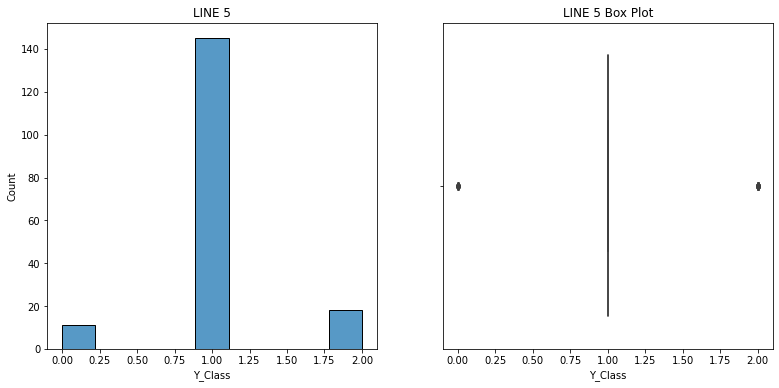

1 데이터 갯수 : 70
Y_Class의 최대값 : 2
Y_Class의 최소값 : 0
Y_Class의 평균값 : 1.3
Y_Class의 중앙값 : 1.0


<ipython-input-264-3ac6e3c47aca>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


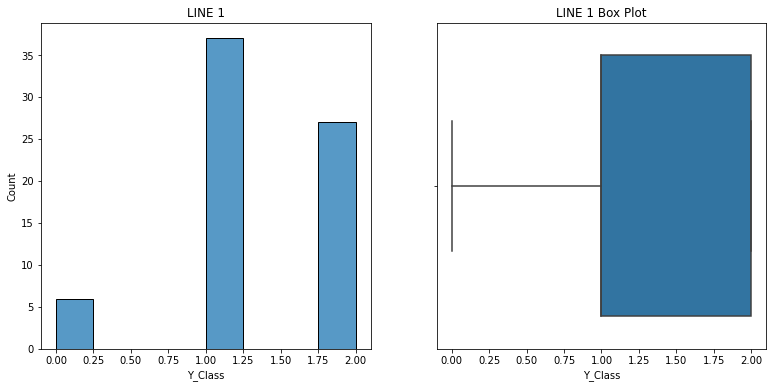

0 데이터 갯수 : 59
Y_Class의 최대값 : 2
Y_Class의 최소값 : 0
Y_Class의 평균값 : 0.9661016949152542
Y_Class의 중앙값 : 1.0


<ipython-input-264-3ac6e3c47aca>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)


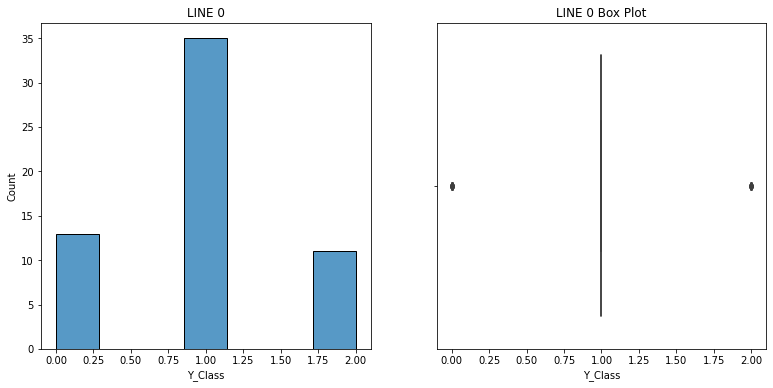

In [267]:
value_hist2(train_df,"LINE")

In [268]:
code = train_df["PRODUCT_CODE"].unique()

train_product = [] 
for i in code :
  train_product.append(train_df.loc[train_df['PRODUCT_CODE'].isin([i])])

train_line = []
for df in train_product : 
  line = df['LINE'].unique() 
  for i in line : 
      train_line.append(df.loc[df['LINE'].isin([i])])

comb = []
cols = dict()
for df in train_line :
  size = len(df)
  comb.append((df['PRODUCT_CODE'].unique()[0], df["LINE"].unique()[0]))
  cols[comb[-1]] = []
  for col in df.columns : 
    if (df[col].isnull().sum() == size) :
      cols[comb[-1]].append(col)

for i in range(len(train_line)) :
  train_line[i] = train_line[i].fillna(train_line[i].mean()) # 결측치 처리 
  train_line[i] = train_line[i].fillna(0)
comb

[(0, 2), (0, 3), (0, 1), (0, 0), (2, 4), (2, 5), (1, 4), (1, 5)]

In [272]:
from scipy.stats import pearsonr

select_features = dict() 
cnt = 0
for df in train_line :  
  df = df.drop(cols[comb[cnt]], axis = 1)
  df = df.drop(["Y_Class", "Y_Quality"], axis = 1)
 
# Calculate the Pearson's correlation coefficient for each feature
  correlation_matrix = np.corrcoef(df.values.T)

# Select the features with a correlation coefficient above a certain threshold
  threshold = 0.8
  relevant_features = []
  for i in range(len(correlation_matrix)):
      for j in range(i+1, len(correlation_matrix)):
          if abs(correlation_matrix[i][j]) > threshold:
              relevant_features.append(df.columns[i])

  relevant_features = list(set(relevant_features))
  print(len(relevant_features))
  select_features[comb[cnt]] = relevant_features
  cnt += 1

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


1099
1231
401
420
269
265
443
436


In [274]:
import xgboost as xgb

model = dict()
cnt = 0

for df in train_line :
  y_train = df["Y_Class"]
  X_train = df[select_features[comb[cnt]]]
  clf = xgb.XGBClassifier(n_jobs=-1)
  clf.fit(X_train, y_train)
  model[comb[cnt]] = clf
  cnt += 1

In [275]:
model

{(0, 2): XGBClassifier(n_jobs=-1, objective='multi:softprob'),
 (0, 3): XGBClassifier(n_jobs=-1, objective='multi:softprob'),
 (0, 1): XGBClassifier(n_jobs=-1, objective='multi:softprob'),
 (0, 0): XGBClassifier(n_jobs=-1, objective='multi:softprob'),
 (2, 4): XGBClassifier(n_jobs=-1, objective='multi:softprob'),
 (2, 5): XGBClassifier(n_jobs=-1, objective='multi:softprob'),
 (1, 4): XGBClassifier(n_jobs=-1),
 (1, 5): XGBClassifier(n_jobs=-1)}

In [276]:
submit = pd.read_csv('/content/drive/MyDrive/LGAimers/sample_submission.csv')

In [277]:
# comb = [(0, 2), (0, 3), (0, 1), (0, 0), (2, 4), (2, 5), (1, 4), (1, 5)]

In [278]:
t = dict()
for i in range(len(comb)) :
  t[comb[i]] = train_line[i]

In [326]:
y_preds = []

for i in range(len(test_df)) :
  row = pd.DataFrame(test_df.iloc[i])
  row = np.transpose(row)
  name = (row['PRODUCT_CODE'][i], row['LINE'][i])
  test_row = row[select_features[name]]
  test_row.fillna(t[name].mean())
  test_row.fillna(0)
  y_preds.append(model[name].predict(test_row)[0])


In [ ]:
y_preds

In [329]:
submit['Y_Class'] = y_preds
submit.to_csv('./submission.csv', index=False)